## 需求：股票分析
- 使用tushare包获取某股票的历史行情数据
- 输出该股票所有收盘比开盘上涨3%以上的日期
- 输出该股票所有开盘比前日收盘跌幅超过2%的日期

In [26]:
import tushare as ts
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt

In [27]:
print(ts.__version__)

1.2.85


In [28]:
#获取某只股票的历史行情数据
df:DataFrame = ts.get_k_data('000600',start='2022-01-01')
df

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


D:\pyWork\dataAny\venv\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


,date,open,close,high,low,volume,code
0,2022-01-04,5.13,5.07,5.19,5.04,195846.0,000600
1,2022-01-05,5.05,4.94,5.06,4.90,195612.0,000600
2,2022-01-06,4.90,4.94,4.98,4.90,114414.0,000600
3,2022-01-07,4.93,4.85,4.98,4.83,142324.0,000600
4,2022-01-10,4.81,4.91,4.95,4.77,142625.0,000600
...,...,...,...,...,...,...,...
212,2022-11-21,5.27,5.35,5.45,5.23,393258.0,000600
213,2022-11-22,5.37,5.18,5.37,5.15,336754.0,000600
214,2022-11-23,5.21,5.70,5.70,5.18,1210296.0,000600
215,2022-11-24,5.88,6.27,6.27,5.78,1715659.0,000600


In [29]:
#将获取的数据存储到本地
df.to_csv(r'C:\Users\lingdj\Desktop\000600.csv')
# DataFrame.to_csv(df,r'C:\Users\lingdj\Desktop\000600.csv')

In [30]:
#将本地存储数据读入到df
stockDf = pd.read_csv(r'C:\Users\lingdj\Desktop\000600.csv')
stockDf.head() #前5行

,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2022-01-04,5.13,5.07,5.19,5.04,195846.0,600
1,1,2022-01-05,5.05,4.94,5.06,4.90,195612.0,600
2,2,2022-01-06,4.90,4.94,4.98,4.90,114414.0,600
3,3,2022-01-07,4.93,4.85,4.98,4.83,142324.0,600
4,4,2022-01-10,4.81,4.91,4.95,4.77,142625.0,600


In [31]:
# 删除df中指定的一列
stockDf.drop(labels='Unnamed: 0',axis=1,inplace=True)
stockDf

,date,open,close,high,low,volume,code
0,2022-01-04,5.13,5.07,5.19,5.04,195846.0,600
1,2022-01-05,5.05,4.94,5.06,4.90,195612.0,600
2,2022-01-06,4.90,4.94,4.98,4.90,114414.0,600
3,2022-01-07,4.93,4.85,4.98,4.83,142324.0,600
4,2022-01-10,4.81,4.91,4.95,4.77,142625.0,600
...,...,...,...,...,...,...,...
212,2022-11-21,5.27,5.35,5.45,5.23,393258.0,600
213,2022-11-22,5.37,5.18,5.37,5.15,336754.0,600
214,2022-11-23,5.21,5.70,5.70,5.18,1210296.0,600
215,2022-11-24,5.88,6.27,6.27,5.78,1715659.0,600


In [32]:
stockDf['date'].dtype
stockDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    217 non-null    object 
 1   open    217 non-null    float64
 2   close   217 non-null    float64
 3   high    217 non-null    float64
 4   low     217 non-null    float64
 5   volume  217 non-null    float64
 6   code    217 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.0+ KB


In [33]:
# 将date转为时间序列类型
stockDf['date'] = pd.to_datetime(stockDf['date'])

In [34]:
stockDf['date'].dtype
stockDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    217 non-null    datetime64[ns]
 1   open    217 non-null    float64       
 2   close   217 non-null    float64       
 3   high    217 non-null    float64       
 4   low     217 non-null    float64       
 5   volume  217 non-null    float64       
 6   code    217 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.0 KB


In [35]:
# 将date列作为原数据的行索引
stockDf.set_index('date',inplace=True)
stockDf

,open,close,high,low,volume,code
date,,,,,,
2022-01-04,5.13,5.07,5.19,5.04,195846.0,600
2022-01-05,5.05,4.94,5.06,4.90,195612.0,600
2022-01-06,4.90,4.94,4.98,4.90,114414.0,600
2022-01-07,4.93,4.85,4.98,4.83,142324.0,600
2022-01-10,4.81,4.91,4.95,4.77,142625.0,600
...,...,...,...,...,...,...
2022-11-21,5.27,5.35,5.45,5.23,393258.0,600
2022-11-22,5.37,5.18,5.37,5.15,336754.0,600
2022-11-23,5.21,5.70,5.70,5.18,1210296.0,600


### 输出该股票开盘比前日收盘跌幅超过2%的日期
### 伪代码（开盘-前日收盘）/前日收盘 <-0.02
### stockDf['open']-stockDf['close']

In [36]:
stockDf['close'].shift(1)

date
2022-01-04     NaN
2022-01-05    5.07
2022-01-06    4.94
2022-01-07    4.94
2022-01-10    4.85
              ... 
2022-11-21    5.31
2022-11-22    5.35
2022-11-23    5.18
2022-11-24    5.70
2022-11-25    6.27
Name: close, Length: 217, dtype: float64

In [37]:
# (stockDf['open'] - stockDf['close'].shift(1))/stockDf['close'].shift(1) < -0.02
# 将bool 作为源数据的行索引取出True对应的行数据
stockDf.loc[(stockDf['open'] - stockDf['close'].shift(1))/stockDf['close'].shift(1) < -0.02].index

DatetimeIndex(['2022-04-29', '2022-05-05', '2022-05-06', '2022-07-06',
               '2022-07-13', '2022-07-14', '2022-07-15', '2022-07-25',
               '2022-09-23', '2022-10-17', '2022-10-26', '2022-10-27'],
              dtype='datetime64[ns]', name='date', freq=None)

### 从22年1月 每月第一个交易日买入1手，到最后一个交易日卖出所有，求收益
##### 时间节点：2022.1.1-2022.11.25
##### 一手股票：100
##### 买：每月第一个交易日
##### 卖：最后25日
##### 单价：买开盘价

In [38]:
stockDf

,open,close,high,low,volume,code
date,,,,,,
2022-01-04,5.13,5.07,5.19,5.04,195846.0,600
2022-01-05,5.05,4.94,5.06,4.90,195612.0,600
2022-01-06,4.90,4.94,4.98,4.90,114414.0,600
2022-01-07,4.93,4.85,4.98,4.83,142324.0,600
2022-01-10,4.81,4.91,4.95,4.77,142625.0,600
...,...,...,...,...,...,...
2022-11-21,5.27,5.35,5.45,5.23,393258.0,600
2022-11-22,5.37,5.18,5.37,5.15,336754.0,600
2022-11-23,5.21,5.70,5.70,5.18,1210296.0,600


In [39]:
# 买：每个月第一个交易日的行数据（开盘价） 每月第一行数据
#根据月份从原始数据中心提取指定的数据 （取出的索引有问题）
df_monthly = stockDf.resample('M').first()#数据的重新取样
df_monthly

,open,close,high,low,volume,code
date,,,,,,
2022-01-31,5.13,5.07,5.19,5.04,195846.0,600
2022-02-28,4.37,4.43,4.47,4.37,87458.0,600
2022-03-31,4.52,4.52,4.57,4.49,66540.0,600
2022-04-30,4.08,4.12,4.14,4.06,59493.0,600
2022-05-31,4.06,4.17,4.18,4.03,192028.0,600
2022-06-30,4.37,4.39,4.41,4.32,97137.0,600
2022-07-31,4.35,4.64,4.64,4.31,240808.0,600
2022-08-31,5.00,5.05,5.12,4.88,403143.0,600
2022-09-30,4.85,4.72,4.86,4.70,257383.0,600


In [40]:
cost = np.around(df_monthly['open'].sum()*100,2) #
cost

5024.0

In [41]:
#计算卖出价格 最后一个交易日
resv = stockDf.loc['2022-11-25','close'] * df_monthly.index.size * 100
resv

6611.0

In [42]:
#总收益
resv-cost

1587.0

# 双均线策略
- 计算股票历史数据的5日均线和60日均线

In [43]:
stockDf = pd.read_csv(r'C:\Users\lingdj\Desktop\000600.csv')
stockDf

,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2022-01-04,5.13,5.07,5.19,5.04,195846.0,600
1,1,2022-01-05,5.05,4.94,5.06,4.90,195612.0,600
2,2,2022-01-06,4.90,4.94,4.98,4.90,114414.0,600
3,3,2022-01-07,4.93,4.85,4.98,4.83,142324.0,600
4,4,2022-01-10,4.81,4.91,4.95,4.77,142625.0,600
...,...,...,...,...,...,...,...,...
212,212,2022-11-21,5.27,5.35,5.45,5.23,393258.0,600
213,213,2022-11-22,5.37,5.18,5.37,5.15,336754.0,600
214,214,2022-11-23,5.21,5.70,5.70,5.18,1210296.0,600
215,215,2022-11-24,5.88,6.27,6.27,5.78,1715659.0,600


In [44]:
stockDf.drop(labels='Unnamed: 0',axis=1,inplace=True)
pd.to_datetime(stockDf['date'])
stockDf

,date,open,close,high,low,volume,code
0,2022-01-04,5.13,5.07,5.19,5.04,195846.0,600
1,2022-01-05,5.05,4.94,5.06,4.90,195612.0,600
2,2022-01-06,4.90,4.94,4.98,4.90,114414.0,600
3,2022-01-07,4.93,4.85,4.98,4.83,142324.0,600
4,2022-01-10,4.81,4.91,4.95,4.77,142625.0,600
...,...,...,...,...,...,...,...
212,2022-11-21,5.27,5.35,5.45,5.23,393258.0,600
213,2022-11-22,5.37,5.18,5.37,5.15,336754.0,600
214,2022-11-23,5.21,5.70,5.70,5.18,1210296.0,600
215,2022-11-24,5.88,6.27,6.27,5.78,1715659.0,600


In [45]:
stockDf.set_index('date',inplace=True)
stockDf

,open,close,high,low,volume,code
date,,,,,,
2022-01-04,5.13,5.07,5.19,5.04,195846.0,600
2022-01-05,5.05,4.94,5.06,4.90,195612.0,600
2022-01-06,4.90,4.94,4.98,4.90,114414.0,600
2022-01-07,4.93,4.85,4.98,4.83,142324.0,600
2022-01-10,4.81,4.91,4.95,4.77,142625.0,600
...,...,...,...,...,...,...
2022-11-21,5.27,5.35,5.45,5.23,393258.0,600
2022-11-22,5.37,5.18,5.37,5.15,336754.0,600
2022-11-23,5.21,5.70,5.70,5.18,1210296.0,600


In [46]:
# 5日，10日均线
ma5 = stockDf['close'].rolling(5).mean()
ma10 = stockDf['close'].rolling(10).mean()

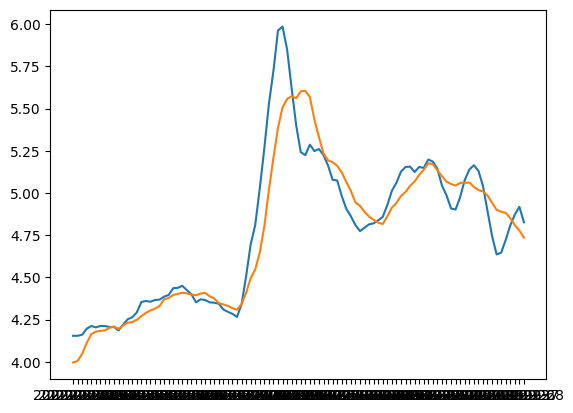

In [47]:
plt.plot(ma5[80:180])
plt.plot(ma10[80:180])
plt.show()

In [48]:
ma5

date
2022-01-04      NaN
2022-01-05      NaN
2022-01-06      NaN
2022-01-07      NaN
2022-01-10    4.942
              ...  
2022-11-21    5.346
2022-11-22    5.314
2022-11-23    5.372
2022-11-24    5.562
2022-11-25    5.702
Name: close, Length: 217, dtype: float64

In [49]:
#分析金叉和死叉日期
#过滤控制
ma5 = ma5[10:]
ma10 = ma10[10:]
s1 = ma5<ma10
s2 = ma5>ma10

In [50]:
s1

date
2022-01-18     True
2022-01-19     True
2022-01-20     True
2022-01-21     True
2022-01-24     True
              ...  
2022-11-21    False
2022-11-22    False
2022-11-23    False
2022-11-24    False
2022-11-25    False
Name: close, Length: 207, dtype: bool

In [52]:
#死叉判定条件
death_index = s1 & s2.shift(1)
death_index
stockDf[10:].loc[death_index].index

Index(['2022-02-18', '2022-03-09', '2022-03-29', '2022-04-21', '2022-05-23',
       '2022-06-17', '2022-07-19', '2022-09-01', '2022-09-16', '2022-09-29',
       '2022-10-25', '2022-11-02', '2022-11-14'],
      dtype='object', name='date')

In [56]:
# 金叉判定条件
gold_index = ~(s1 | s2.shift(1))
stockDf[10:].loc[gold_index].index

Index(['2022-02-10', '2022-03-03', '2022-03-25', '2022-04-07', '2022-04-20',
       '2022-05-06', '2022-05-25', '2022-07-04', '2022-08-12', '2022-09-08',
       '2022-09-26', '2022-10-14', '2022-10-28', '2022-11-04', '2022-11-18'],
      dtype='object', name='date')